In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier


In [2]:
df = pd.read_csv("CSVs/Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df.drop(columns=['User ID','Gender'])

In [5]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
X=df.drop(columns=['Purchased'])
y=df.iloc[:,-1]
X,y

(     Age  EstimatedSalary
 0     19            19000
 1     35            20000
 2     26            43000
 3     27            57000
 4     19            76000
 ..   ...              ...
 395   46            41000
 396   51            23000
 397   50            20000
 398   36            33000
 399   49            36000
 
 [400 rows x 2 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 395    1
 396    1
 397    1
 398    0
 399    1
 Name: Purchased, Length: 400, dtype: int64)

In [7]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

X_scaled = scale.fit_transform(X)
X_scaled

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

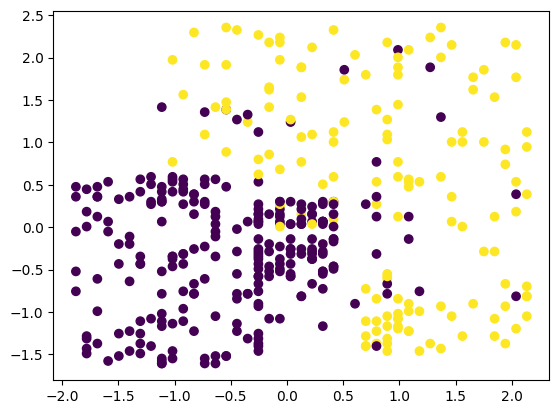

In [8]:
import matplotlib.pyplot as plt

plt.scatter(X_scaled[:,0],X_scaled[:,1],c=y)


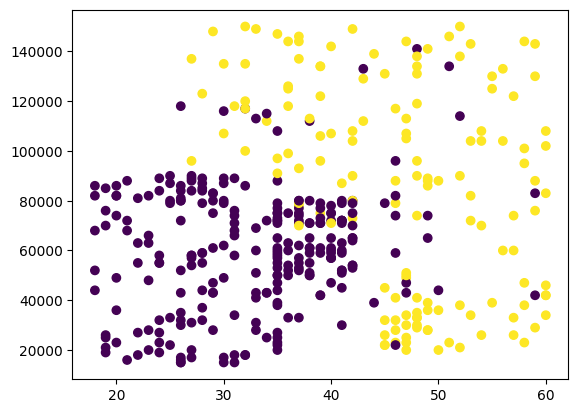

In [9]:
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y)

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=13)

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8875

### Creating Decision Region Boundary

In [13]:
X_a = np.arange(start=X_train[:,0].min()-1,stop=X_train[:,0].max()+1,step=0.01)
X_b = np.arange(start=X_train[:,1].min()-1,stop=X_train[:,1].max()+1,step=0.01)

In [14]:
X_b.shape

(597,)

#### creating a meshgrid 

In [15]:
XX,YY = np.meshgrid(X_a,X_b)

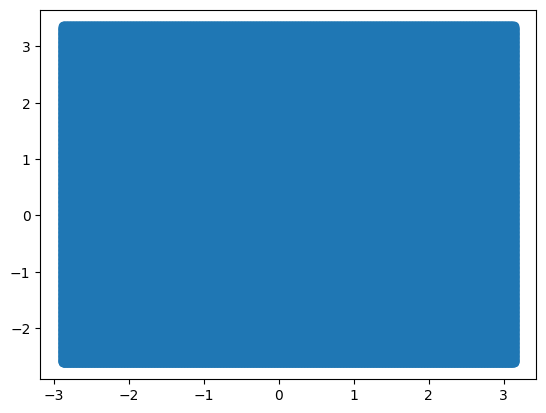

In [23]:
plt.scatter(XX,YY)

In [16]:
XX.shape

(597, 602)

In [17]:
X_test.shape

(80, 2)

In [18]:
np.array([XX.ravel(),YY.ravel()]).T

array([[-2.87731056, -2.60750566],
       [-2.86731056, -2.60750566],
       [-2.85731056, -2.60750566],
       ...,
       [ 3.11268944,  3.35249434],
       [ 3.12268944,  3.35249434],
       [ 3.13268944,  3.35249434]], shape=(359394, 2))

In [19]:
labels=knn.predict(np.array([XX.ravel(),YY.ravel()]).T)

In [20]:
labels

array([0, 0, 0, ..., 1, 1, 1], shape=(359394,))

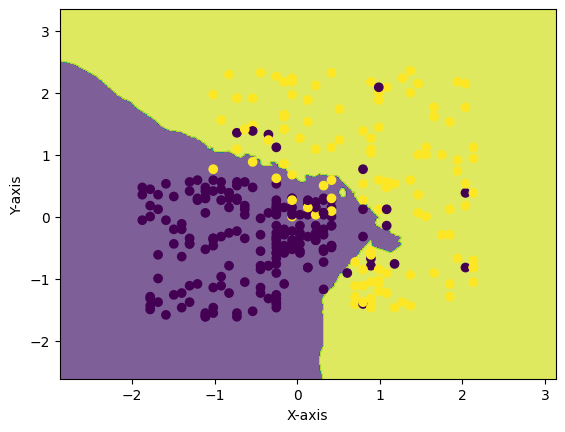

In [22]:
plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.7)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()